In [1]:
# Loading the dataset
from dataset import PersonDataset
from torch.utils.data import random_split, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
root_dir = '/media/enrique/Extreme SSD/person'
sequence_list = [f'person-{i}' for i in range(1, 21)]
sequence_list = ["person-9"]
dataset = PersonDataset(root_dir=root_dir, sequence_list=sequence_list, img_transform_size=(640, 640), template_transform_size=(256, 256), max_num_templates=10, max_detections = 300)

batch_size = 1
# Optionally, create DataLoader objects for the training and validation sets
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [3]:


def visualize_batch_data_sample(data_sample):
    # Extract the batch of images, bounding boxes, and original dimensions
    imgs = data_sample["img"]  # Batch of images (B, C, H, W)
    bounding_boxes = data_sample["bounding_boxes"]  # Batch of bounding boxes (B, N, 4)
    orig_dims = data_sample["orig_dim"]  # Batch of original image dimensions (B, 2)

    batch_size = imgs.shape[0]  # Get the batch size

    for i in range(batch_size):
        # Extract the image, bounding boxes, and original dimensions for the i-th sample
        img = imgs[i].permute(1, 2, 0).detach().cpu().numpy()  # Convert from PyTorch tensor to NumPy and swap channels (H, W, C)
        img = (img * 255).astype("uint8").copy()  # Denormalize image if it's normalized to [0, 1]
        orig_h, orig_w = orig_dims  # Get the original height and width of the i-th image

        # Resize the image to the original dimensions
        img = cv2.resize(img, (orig_w.item(), orig_h.item()))

        # Loop over each bounding box for the i-th image
        for j in range(bounding_boxes[i].shape[0]):
            # Bounding box format: (x_center, y_center, width, height) with unit scaling
            x_center, y_center, w, h = bounding_boxes[i, j]

            # Rescale the bounding box to the original image dimensions
            x_center = x_center * orig_w
            y_center = y_center * orig_h
            w = w * orig_w
            h = h * orig_h

            # Calculate the top-left and bottom-right corners of the bounding box
            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = int(x_center + w / 2)
            y2 = int(y_center + h / 2)

            # Draw the bounding box on the image using OpenCV (red color, thickness=2)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        # Display the image with bounding boxes using Matplotlib
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR (OpenCV format) to RGB for Matplotlib
        plt.axis("off")  # Hide axes
        plt.show()


tensor([[[0.6453, 0.5819, 0.0703, 0.2597],
         [0.5422, 0.4000, 0.0203, 0.0458],
         [0.4875, 0.4889, 0.0508, 0.2653],
         ...,
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]]])
Number bboxes tensor([9])


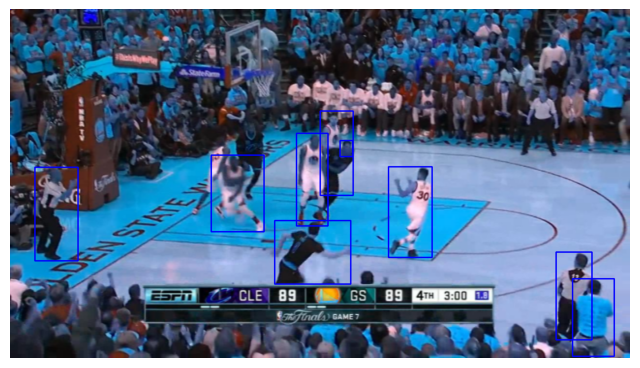

In [4]:
# Example usage with your DataLoader
# Assume your DataLoader is already defined as `dataloader`
# Get a sample from the DataLoader
data_sample = next(iter(data_loader))

print(data_sample["bounding_boxes"])

print("Number bboxes", data_sample["num_boxes"])
# Visualize the data sample
visualize_batch_data_sample(data_sample)

In [5]:
for epoch in range(10):
    for batch in data_loader:

        for i in range(len(batch["img"])):
            print(batch["img_path"][i])
            print(batch["orig_dim"][i])
            print(batch["bounding_boxes"][i][:batch['num_boxes'], :])

/media/enrique/Extreme SSD/person/person-9/img/00000466.jpg
tensor([720])
tensor([[0.9398, 0.6764, 0.0555, 0.2819],
        [0.6656, 0.5292, 0.0469, 0.3861]])
/media/enrique/Extreme SSD/person/person-9/img/00000464.jpg
tensor([720])
tensor([[0.9414, 0.6833, 0.0555, 0.2847],
        [0.6695, 0.5417, 0.0656, 0.3861],
        [0.5797, 0.7194, 0.0859, 0.1375]])
/media/enrique/Extreme SSD/person/person-9/img/00000589.jpg
tensor([720])
tensor([[0.0828, 0.5500, 0.1023, 0.2375],
        [0.1508, 0.4486, 0.0609, 0.2097],
        [0.1961, 0.5028, 0.0688, 0.2389],
        [0.8039, 0.6292, 0.0695, 0.2167],
        [0.5203, 0.3556, 0.0703, 0.1792],
        [0.5188, 0.6569, 0.0945, 0.2458],
        [0.3883, 0.4389, 0.0367, 0.2028],
        [0.8000, 0.4361, 0.0422, 0.1986]])
/media/enrique/Extreme SSD/person/person-9/img/00001116.jpg
tensor([720])
tensor([[0.5828, 0.6667, 0.0641, 0.2472],
        [0.7883, 0.8750, 0.0672, 0.2458]])
/media/enrique/Extreme SSD/person/person-9/img/00000923.jpg
tensor([72

KeyboardInterrupt: 